# Clustering     (unsupervised Learning)

In [1]:
from sklearn.cluster import KMeans
import numpy as  np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X = iris.data
y = iris.target

# Kmean Clustering 

In [4]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
centroid = kmeans.cluster_centers_

C:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shahe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
print("Preidcted labels : ",labels)

Preidcted labels :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
print("Actual target is : ",y)  # no need this        in unsupervised learning there is no labeled data

Actual target is :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Evalution Metrics 

In [7]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

print("Silhouette Score is : ", silhouette_score(X,labels))
print("Davies bouldin index : ",davies_bouldin_score(X,labels))
print("Inertia is : ",kmeans.inertia_)

Silhouette Score is :  0.5528190123564095
Davies bouldin index :  0.6619715465007484
Inertia is :  78.85144142614601


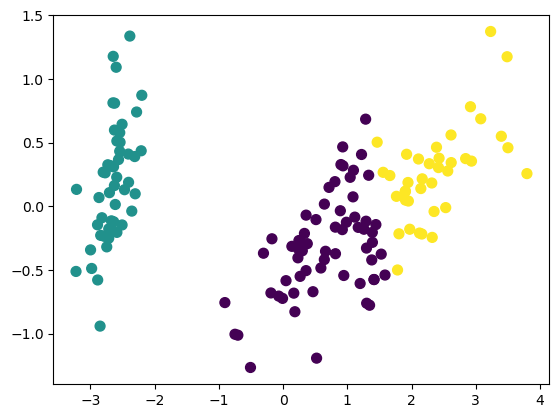

In [8]:
from sklearn.decomposition import PCA      # for reducing diemntion to 2d
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)   


plt.scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.show()

# DBSCAN CLUSTERING

In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,min_samples=5)
label_db = dbscan.fit_predict(X)


In [10]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

print("Silhouette Score is : ", silhouette_score(X,label_db))
print("Davies bouldin index : ",davies_bouldin_score(X,label_db))

Silhouette Score is :  0.48603419703456857
Davies bouldin index :  7.222448016359595


# Hierarchical Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering

hire = AgglomerativeClustering(n_clusters=3)
label_hr = hire.fit_predict(X)

In [12]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

print("Silhouette Score is : ", silhouette_score(X,label_hr))
print("Davies bouldin index : ",davies_bouldin_score(X,label_hr))

Silhouette Score is :  0.5543236611296419
Davies bouldin index :  0.656256454064201


# Regression   (supervised learning)

In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [14]:
data = fetch_california_housing()

In [15]:
df = pd.DataFrame(data.data,columns=data.feature_names)    # we created data frame  there is no target variable coulmn
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [16]:
# adding target column
df['Target'] = data.target
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [17]:
# Features and Target                  (here we selecting 3 features for eassy learn)

In [18]:
X = df[["MedInc","AveRooms","AveOccup","HouseAge"]]
y = df["Target"]

In [19]:
# Spliting data for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
# Model selecting and trainaing

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [21]:
# make prediction 
y_pred = model.predict(X_test)

In [22]:
print(y_pred)      # model predicted price

[1.06676024 1.50932262 2.33218876 ... 1.50479162 2.97506562 3.40895582]


### Now Lets Evalute the model predictions 

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MaE  of Model is : ",mean_absolute_error(y_pred,y_test))
mse = mean_squared_error(y_pred,y_test)
print("Mse  of Model is : ",mse)
print("RMSE of Model is : ",np.sqrt(mse))
print("R^2  of Model is : ",r2_score(y_pred,y_test))




MaE  of Model is :  0.5983510732321655
Mse  of Model is :  0.6444348210135697
RMSE of Model is :  0.8027669780288486
R^2  of Model is :  0.04622525055060822


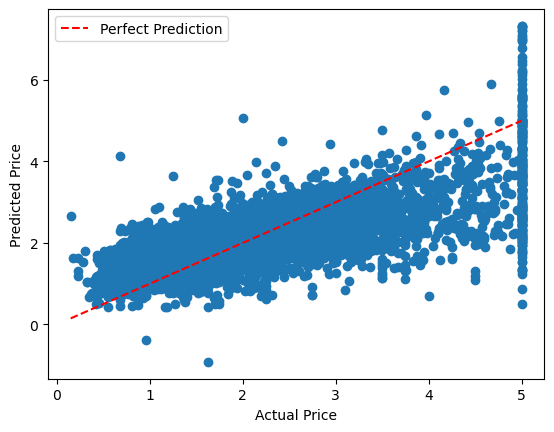

In [24]:
# Actual Price  V/s  Predicted Price 
import matplotlib.pyplot as plt 

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
# Adding a line for perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()


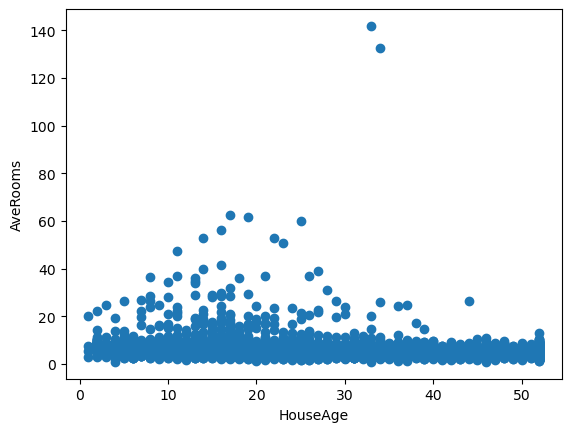

In [25]:
# checking relation between   2 variables    in dataset HouseAge	AveRooms	

plt.scatter(df["HouseAge"],df['AveRooms'])
plt.xlabel("HouseAge")
plt.ylabel("AveRooms")
plt.show()

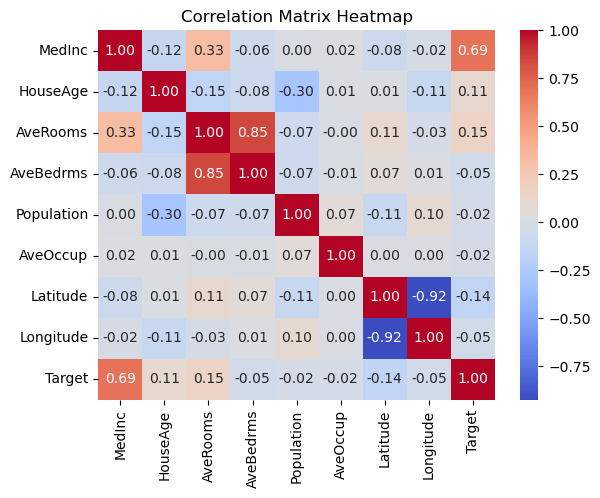

In [26]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


###  Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

#make prediction 
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MaE  of Model is : ",mean_absolute_error(y_pred,y_test))
mse = mean_squared_error(y_pred,y_test)
print("Mse  of Model is : ",mse)
print("RMSE of Model is : ",np.sqrt(mse))
print("R^2  of Model is : ",r2_score(y_pred,y_test))


MaE  of Model is :  0.6480227984496124
Mse  of Model is :  0.8479032497531781
RMSE of Model is :  0.9208166211321221
R^2  of Model is :  0.38428504119572615


# Classification      (Supervised Learning)

In [79]:
from sklearn.datasets import load_iris
import numpy  as np
import pandas as pd

In [80]:
data = load_iris()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['Target'] = data.target 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [81]:
X = data.data
y = data.target

In [82]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
# model   
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)



# predicting by model
y_pred = model.predict(X_test)

### Evalution Matrix

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [54]:
print("Accuracy  of Model : ",accuracy_score(y_test,y_pred,))
print("Precision of Model : ",precision_score(y_test,y_pred,average='macro')) # give like this or use the tool
print("Recall    of Model : ",recall_score(y_test,y_pred,average='micro')) # same as above
print("Confusion matrix   : ",confusion_matrix(y_test,y_pred))

Accuracy  of Model :  1.0
Precision of Model :  1.0
Recall    of Model :  1.0
Confusion matrix   :  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [55]:
print("Classification Report : \n ",classification_report(y_test,y_pred))

Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [56]:
# Confusion Matrix visulization 

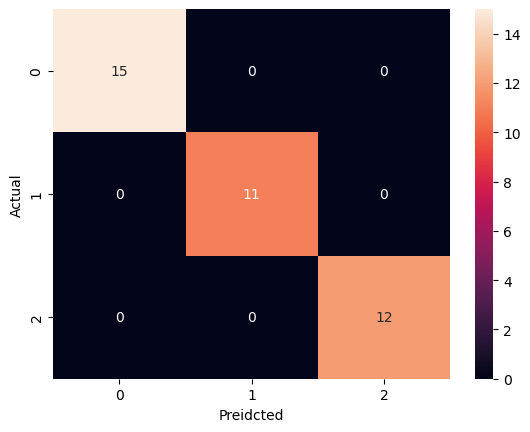

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Preidcted")
plt.ylabel("Actual")
plt.show()

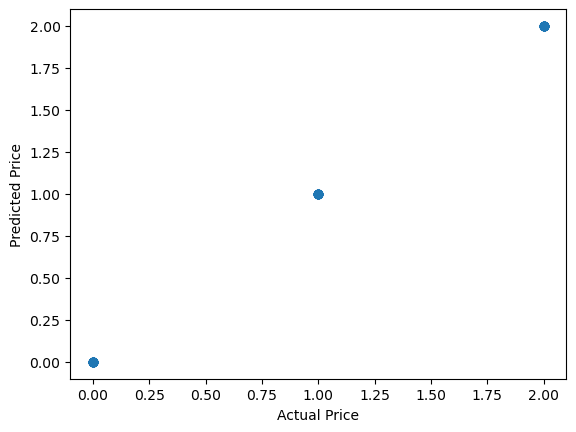

In [68]:
# preidcted vs actual

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

### KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)


In [86]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report


print("Accuracy  of Model : ",accuracy_score(y_test,y_pred,))
print("Precision of Model : ",precision_score(y_test,y_pred,average='macro')) # give like this or use the tool
print("Recall    of Model : ",recall_score(y_test,y_pred,average='micro')) # same as above
print("Confusion matrix   : ",confusion_matrix(y_test,y_pred))

Accuracy  of Model :  1.0
Precision of Model :  1.0
Recall    of Model :  1.0
Confusion matrix   :  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


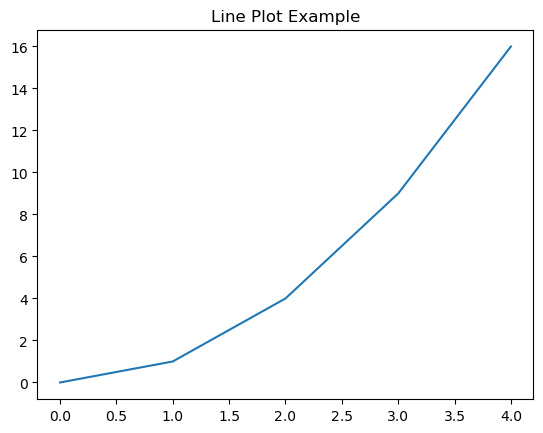

In [2]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

plt.plot(x, y)
plt.title("Line Plot Example")
plt.show()


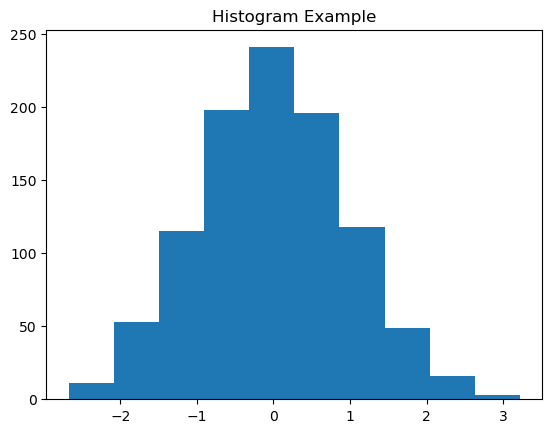

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(1000)

plt.hist(data)
plt.title("Histogram Example")
plt.show()


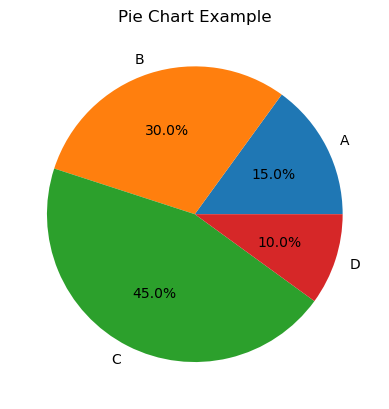

In [8]:
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Pie Chart Example")
plt.show()


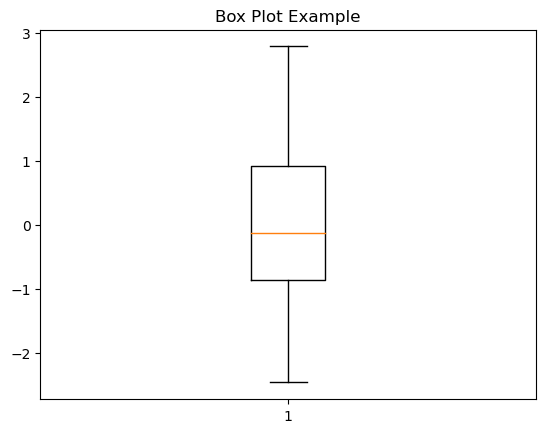

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(100)

plt.boxplot(data)
plt.title("Box Plot Example")
plt.show()
